In [590]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc

# PHASE 1

# DATA PREPROCESSING

In [257]:
df = pd.read_csv("C:\\Users\\ranab\\Downloads\\healthcare-dataset-stroke-data.csv")  #Reading the csv file.

In [258]:
df.head(10)      #Displaying the first 10 tuples of the dataset.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [259]:
df.rename(columns= {'ever_married':'married'},inplace= True)    #Renaming the attribute 'ever_married' to 'married'.

In [260]:
df.shape  #the shape of our dataset is 5110 rows and 12 columns.

(5110, 12)

In [261]:
X=df.describe()   #Statistical model of our dataset.
X.style.background_gradient(cmap = "YlGn")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5104.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.162541,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.307349,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.222500,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.160000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [262]:
df.info()  #information of the data types and non-null values of each attribute is displayed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5103 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   married            5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5104 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

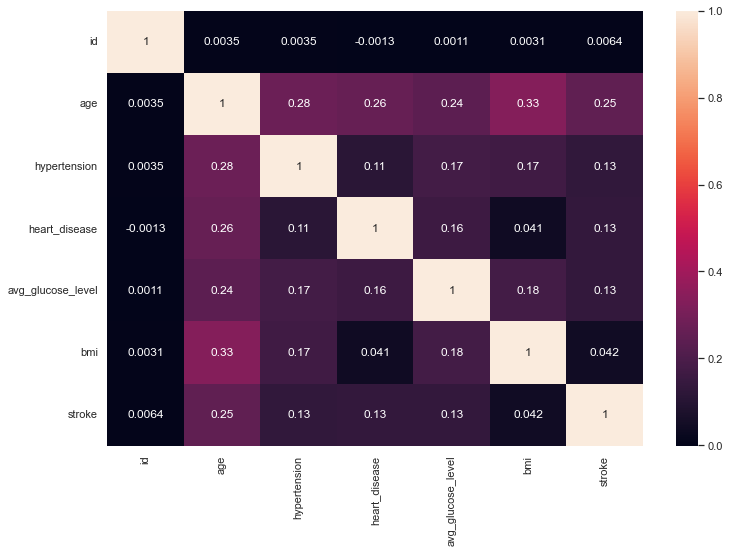

In [263]:
plt.figure()                                             #heatmap displaying correlation among all attributes.
cor = df.corr()
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(cor,annot=True)

In [264]:
df1=df.drop(columns='id',axis=1) #Dropped the least uncorrelated attribute with the target value.
df1

,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [265]:
df1.isna().sum()      #Displaying total null values in each columns

gender                 7
age                    0
hypertension           0
heart_disease          0
married                0
work_type              0
Residence_type         0
avg_glucose_level      6
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [266]:
for i in ['gender','married','work_type','Residence_type','smoking_status','stroke']:
    m=df1[i].value_counts()
    print(i ,':  ')
    print(m,'\n')                #displaying various categorical attributes having distinct features and its count.

gender :  
Female    2991
Male      2111
Other        1
Name: gender, dtype: int64 

married :  
Yes    3353
No     1757
Name: married, dtype: int64 

work_type :  
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type :  
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

smoking_status :  
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

stroke :  
0    4861
1     249
Name: stroke, dtype: int64 



In [267]:
df2= df1[df1.gender != 'Other']   #the unwanted row which had other variable is dropped
df2

,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [268]:
df2['gender'].value_counts()

Female    2991
Male      2111
Name: gender, dtype: int64

In [269]:
df2['avg_glucose_level'].isna().sum()   #displaying total sum of null values in the avg_glucose_level attribute.

6

In [270]:
df2.isna().sum()

gender                 7
age                    0
hypertension           0
heart_disease          0
married                0
work_type              0
Residence_type         0
avg_glucose_level      6
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [271]:
df2['avg_glucose_level']=df2['avg_glucose_level'].dropna()  # Null values were only 6 in avg_glucose_level hence they were dropped. 

C:\Users\ranab\AppData\Local\Temp/ipykernel_27516/1780571773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_glucose_level']=df2['avg_glucose_level'].dropna()  # Null values were only 6 in avg_glucose_level hence they were dropped.


In [272]:
df2['bmi']=df2['bmi'].fillna(28.893237)   # All the null values in bmi attribute were filled with mean value.

C:\Users\ranab\AppData\Local\Temp/ipykernel_27516/4193670153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bmi']=df2['bmi'].fillna(28.893237)   # All the null values in bmi attribute were filled with mean value.


In [273]:
from sklearn.impute import SimpleImputer
Imp = SimpleImputer(missing_values= np.NaN,strategy='most_frequent')
df3 = Imp.fit_transform(df2)                                         #The missing values in gender attribute were changed to the values which ere occured most frequently.

In [274]:
df3 = pd.DataFrame(df3,columns=['gender','age','hypertension','heart_disease','married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']) #Dataframe was formed with all the changes.

In [275]:
df3.isna().sum()     # As displayed here now our dataset is clean.

gender               0
age                  0
hypertension         0
heart_disease        0
married              0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [276]:
L = LabelEncoder()               # Here label Encoding is performed to change the categorical attributes into numerical values.

In [277]:
df3['smoking_status'] = L.fit_transform(df3['smoking_status'])

In [278]:
df3['gender'] = L.fit_transform(df3['gender'])

In [279]:
df3['Residence_type'] = L.fit_transform(df3['Residence_type'])

In [280]:
df3['married'] = L.fit_transform(df3['married'])

In [281]:
df3['work_type'] = L.fit_transform(df3['work_type'])

In [282]:
for i in ['gender','married','work_type','Residence_type','smoking_status','stroke']:
    m=df3[i].value_counts()
    print(i ,':  ')
    print(m,'\n')                #Label formed for each distinct feature is displayed here.

gender :  
0    2998
1    2111
Name: gender, dtype: int64 

married :  
1    3353
0    1756
Name: married, dtype: int64 

work_type :  
2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64 

Residence_type :  
1    2596
0    2513
Name: Residence_type, dtype: int64 

smoking_status :  
2    1892
0    1544
1     884
3     789
Name: smoking_status, dtype: int64 

stroke :  
0    4860
1     249
Name: stroke, dtype: int64 



In [283]:
df3.head(10)    # After changing the strings to integer the dataframe is generated as displayed below. 

,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [284]:
df3.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
married              0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [285]:
df3['bmi'].head(5) 

0         36.6
1    28.893237
2         32.5
3         34.4
4         24.0
Name: bmi, dtype: object

In [286]:
df3['bmi']=df3['bmi'].apply(np.ceil)       #Standardization of the bmi attribute which had non-standard values.

In [287]:
df3.to_csv("C:\\Users\\ranab\\Downloads\\stroke-data_preprocessed.csv")    #Saved the preprocessed data to our device.

In [288]:
from sklearn.preprocessing import OneHotEncoder            #One hot encoding is performed on the attribute name married.

In [289]:
H = OneHotEncoder()

In [290]:
data =pd.DataFrame(H.fit_transform(df3[['married']]).toarray())

In [291]:
df3.join(data)

,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,0,1
0,1,67.0,0,1,1,2,1,228.69,37,1,1,0.0,1.0
1,0,61.0,0,0,1,3,0,202.21,29,2,1,0.0,1.0
2,1,80.0,0,1,1,2,0,105.92,33,2,1,0.0,1.0
3,0,49.0,0,0,1,2,1,171.23,35,3,1,0.0,1.0
4,0,79.0,1,0,1,3,0,174.12,24,2,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,2,1,83.75,29,2,0,0.0,1.0
5105,0,81.0,0,0,1,3,1,125.2,40,2,0,0.0,1.0
5106,0,35.0,0,0,1,3,0,82.99,31,2,0,0.0,1.0
5107,1,51.0,0,0,1,2,0,166.29,26,1,0,0.0,1.0


In [292]:
df3

,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,37,1,1
1,0,61.0,0,0,1,3,0,202.21,29,2,1
2,1,80.0,0,1,1,2,0,105.92,33,2,1
3,0,49.0,0,0,1,2,1,171.23,35,3,1
4,0,79.0,1,0,1,3,0,174.12,24,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,2,1,83.75,29,2,0
5105,0,81.0,0,0,1,3,1,125.2,40,2,0
5106,0,35.0,0,0,1,3,0,82.99,31,2,0
5107,1,51.0,0,0,1,2,0,166.29,26,1,0


# EDA

In [293]:
numerical_features = [i for i in df.columns if df[i].dtype != 'object' and i != 'id']   #Displaying all the numerical features of our dataset.
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [294]:
categorical_features = [i for i in df.columns if i not in numerical_features and i != 'stroke' and i != 'id']  #Displaying all the categorical features of our dataset.
categorical_features

['gender', 'married', 'work_type', 'Residence_type', 'smoking_status']

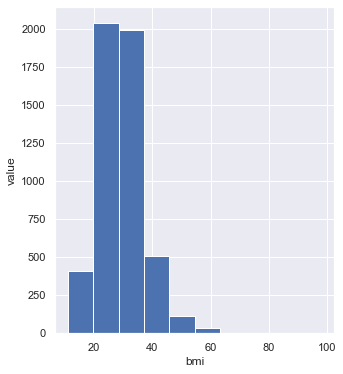

In [295]:
df3['bmi'].hist(figsize = (5, 6))  #Histogram is created to observe the pattern and distribution of bmi values in our dataset.
plt.xlabel('bmi')
plt.ylabel('value')
plt.show()

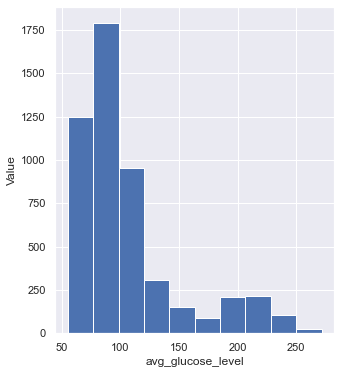

In [296]:
df3['avg_glucose_level'].hist(figsize = (5, 6))  #Histogram is created to observe the pattern and distribution of Average glucose level values in our dataset.
plt.xlabel('avg_glucose_level')
plt.ylabel('Value')
plt.show()

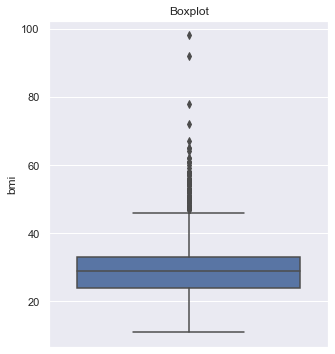

In [297]:
plt.figure(figsize=(5,6))  #to check if bmi has any outliers we ploted boxplot.
sns.boxplot(y=df3['bmi'])
plt.title('Boxplot')
plt.show()

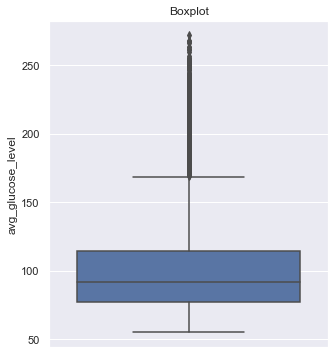

In [298]:
plt.figure(figsize=(5,6))               #to check if average glucose level has any outliers we ploted boxplot.
sns.boxplot(y=df3['avg_glucose_level'])
plt.title('Boxplot')
plt.show()

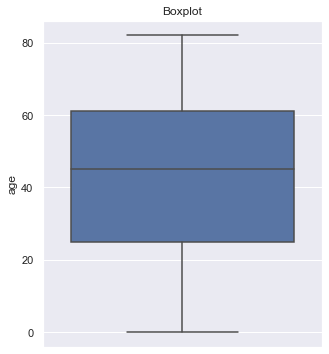

In [299]:
plt.figure(figsize=(5,6))          #to check if age has any outliers we ploted boxplot.
sns.boxplot(y=df['age'])
plt.title('Boxplot')
plt.show()

([<matplotlib.patches.Wedge at 0x19a6ccff670>,
 [Text(-1.0488255832781848, 0.3316095533321921, '0'),
  Text(1.0488255755163025, -0.3316095778817264, '1')],
 [Text(-0.5720866817881006, 0.18087793818119566, '90.3%'),
  Text(0.5720866775543468, -0.18087795157185074, '9.7%')])

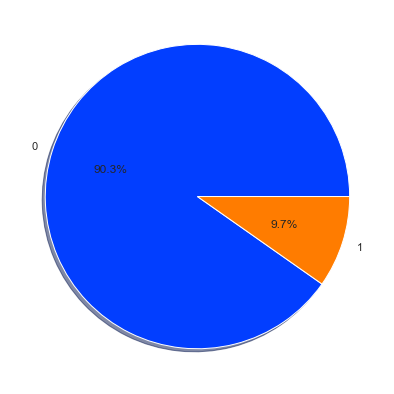

In [300]:
C = df3['hypertension'].value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
plt.pie(x=C,labels=['0','1'],shadow=True,autopct='%1.1f%%',colors=colors)

In [301]:
print(C)

0    4611
1     498
Name: hypertension, dtype: int64


<AxesSubplot:>

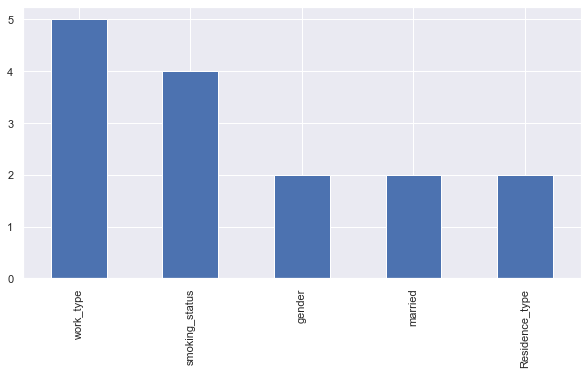

In [302]:
df3[categorical_features].nunique().sort_values(ascending = False).plot.bar(figsize = (10, 5))  #All the categorical features and the labels assigned to each is displayed here.

In [303]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

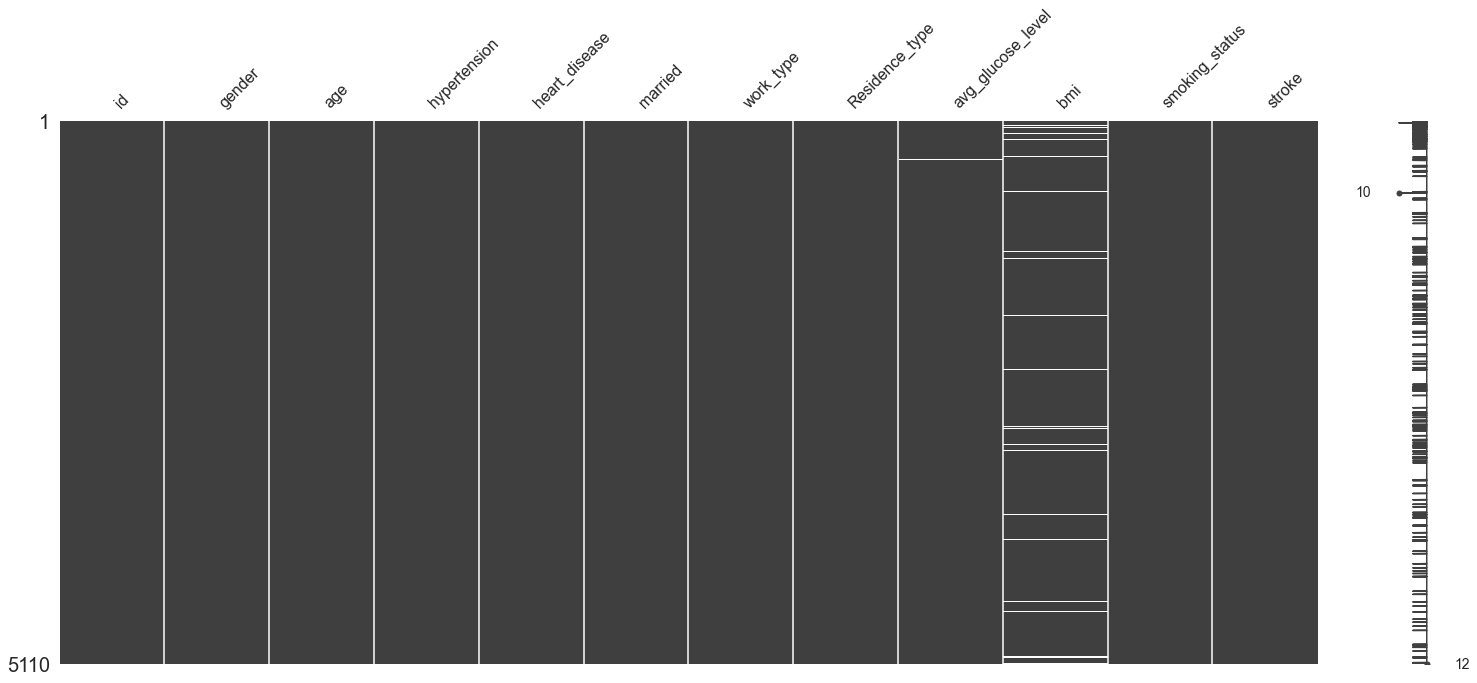

In [304]:
import missingno                   #the white line in the matrix drawn below is the null values.
missingno.matrix(df)

[Text(0.5, 1.0, 'Reason of stroke depending on age and heart_disease in people')]

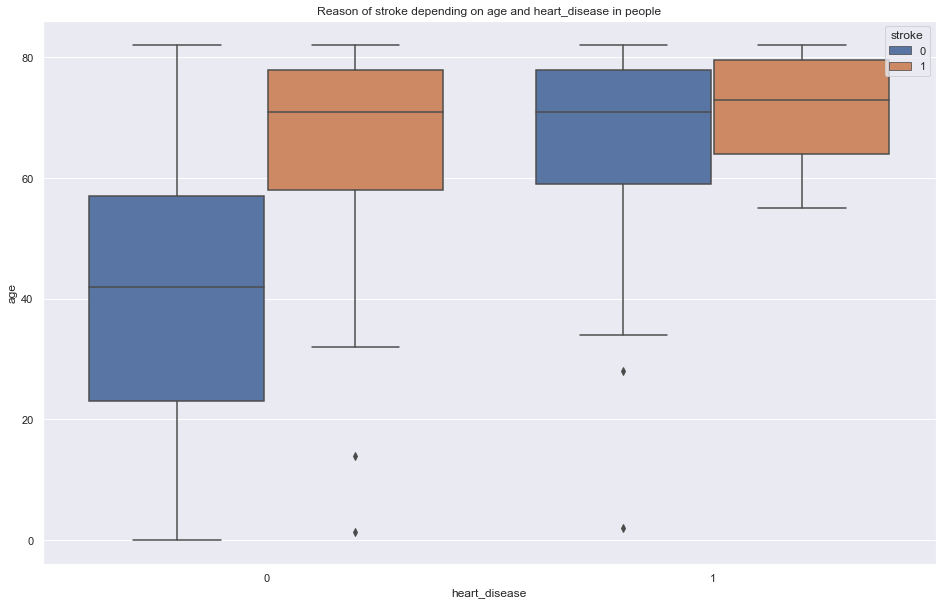

In [305]:
sns.set(rc={"figure.figsize":(16, 10)})
sns.boxplot(data= df3,x="heart_disease", y="age", hue="stroke").set(title = 'Reason of stroke depending on age and heart_disease in people')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

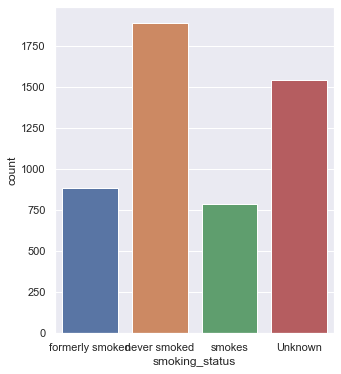

In [306]:
plt.figure(figsize=(5,6))
sns.countplot(data = df, x = "smoking_status")            #Here the count of smoking status distinct variables is displayed using countplot.

In [307]:
X = df3.drop(columns=['gender','hypertension','smoking_status','married','work_type','Residence_type','heart_disease'],axis=1)

<Figure size 720x432 with 0 Axes>

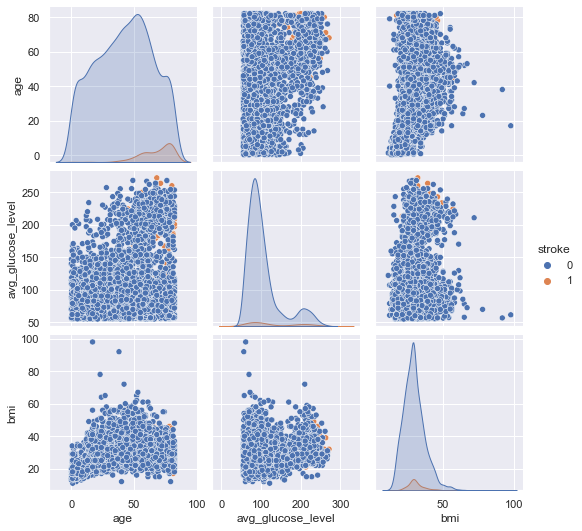

In [308]:
plt.figure(figsize=(10,6))
sns.pairplot(data= X,hue='stroke')
plt.show()                             #pair plot is formed among the attributes extracted in X dataframe w.r.t stroke.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='work_type'>

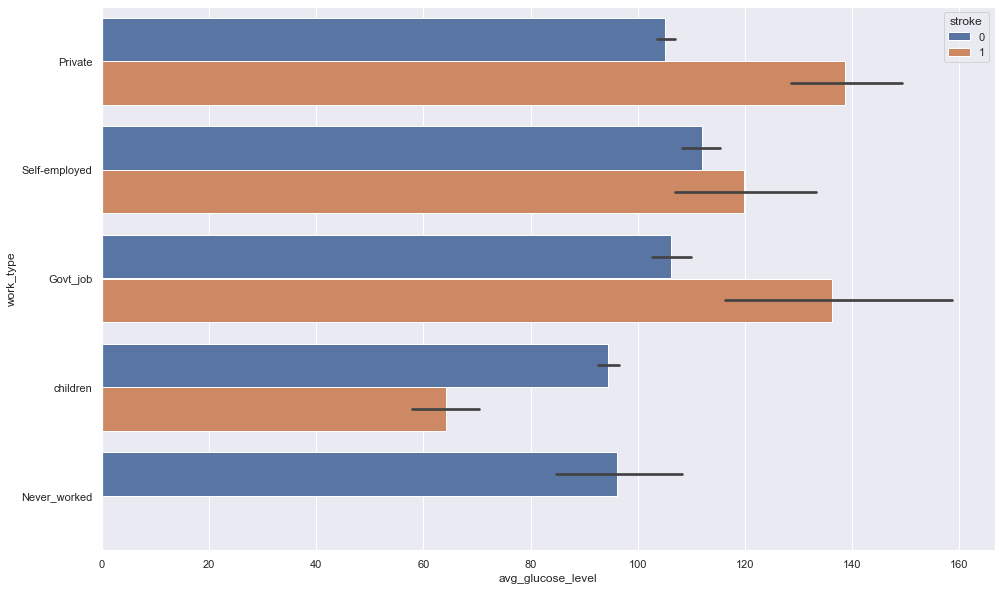

In [309]:
sns.barplot(data= df,x="avg_glucose_level", y="work_type", hue="stroke") #barplot is displayed on the work_type vs avg_glucose_level

<AxesSubplot:xlabel='bmi', ylabel='Residence_type'>

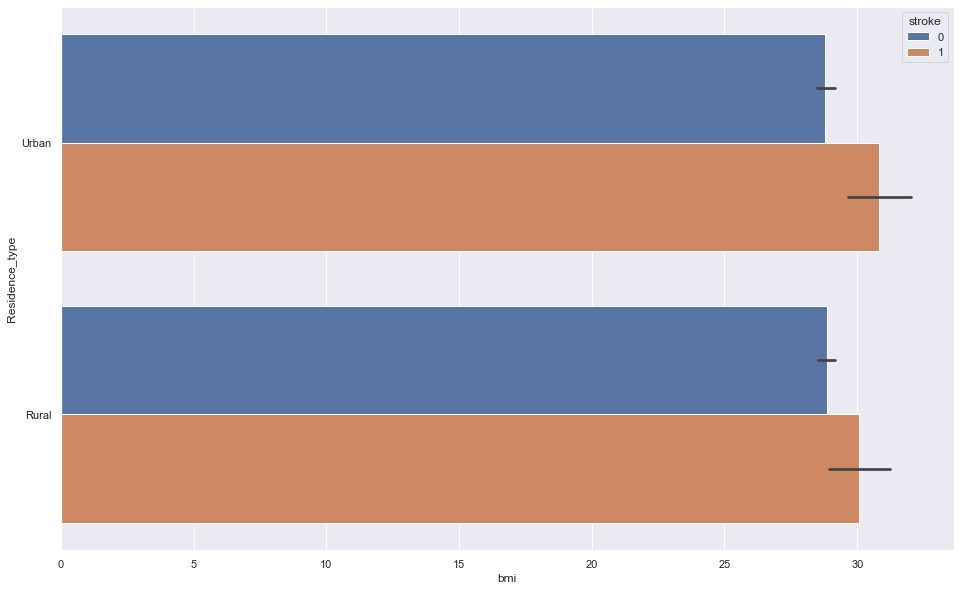

In [310]:
sns.barplot(data= df,x="bmi", y="Residence_type", hue="stroke") 

In [311]:
for i in ['gender','married','work_type','Residence_type','smoking_status','stroke']:
    m=df3[i].value_counts()
    print(i ,':  ')
    print(m,'\n')        

gender :  
0    2998
1    2111
Name: gender, dtype: int64 

married :  
1    3353
0    1756
Name: married, dtype: int64 

work_type :  
2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64 

Residence_type :  
1    2596
0    2513
Name: Residence_type, dtype: int64 

smoking_status :  
2    1892
0    1544
1     884
3     789
Name: smoking_status, dtype: int64 

stroke :  
0    4860
1     249
Name: stroke, dtype: int64 



#                                                    PHASE 2

In [498]:
df4= pd.read_csv("C:\\Users\\ranab\\Downloads\\stroke-data_preprocessed.csv")   #Reading of preprocessed dataset.

In [514]:
X = df4.iloc[:,1:11]                                                      #Splitting the data into dependendent attributes.
X1=X.astype('int')                                                        #Conversion of data type into integer.
X1

,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,1,2,1,228,37,1
1,0,61,0,0,1,3,0,202,29,2
2,1,80,0,1,1,2,0,105,33,2
3,0,49,0,0,1,2,1,171,35,3
4,0,79,1,0,1,3,0,174,24,2
...,...,...,...,...,...,...,...,...,...,...
5491,1,63,1,0,0,1,0,191,20,1
5492,1,74,1,0,0,4,0,121,31,3
5493,1,68,1,0,0,2,0,199,22,2
5494,1,74,1,1,0,1,0,114,29,3


In [516]:
Y = df4.iloc[:,11]                                                          #Splitting the data into target attribute.
Y1= Y.astype('int')                                                         #Conversion of target attribute into integer.
Y1

0       1
1       1
2       1
3       1
4       1
       ..
5491    1
5492    1
5493    1
5494    1
5495    1
Name: stroke, Length: 5496, dtype: int32

# Split the data

In [517]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.20,random_state = 235)   #splitting the dataset into 70:20 ratio.

# Deploying the model

# SVM

In [639]:
from sklearn.svm import SVC
svm = SVC(random_state=1)                                                     #Deploying svm method into the model
svm.fit(X_train,y_train)                                                        

SVC(random_state=1)

In [520]:
y_pred = svm.predict(X_test)    
y_pred                                                                         #predicting the values of y_test

array([0, 0, 0, ..., 0, 0, 0])

In [521]:
y_pred_train = svm.predict(X_train)                                            #predicting the values of y_train

## Train Test Accuracy 

In [606]:
print("Test accuracy_score: " + str(accuracy_score(y_test, y_pred)))
print("Train accuracy_score: " + str(accuracy_score(y_train, y_pred_train)))

Test accuracy_score: 0.9172727272727272
Train accuracy_score: 0.9360782529572339


In [652]:
train_scores = svm.score(X_train,y_train)
test_scores = svm.score(X_test,y_test)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


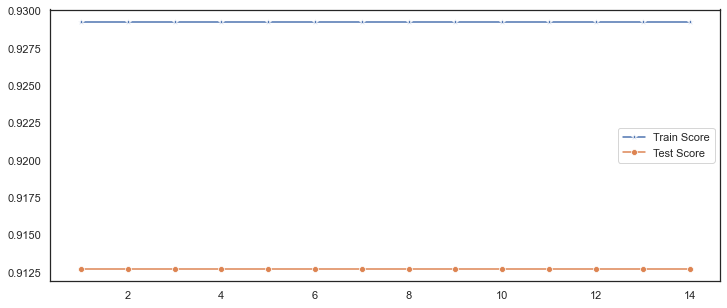

In [653]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

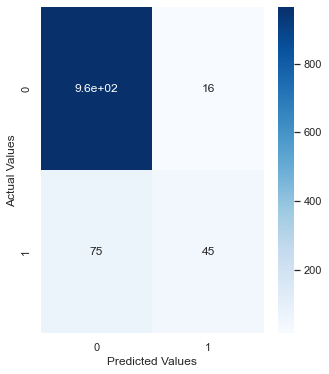

In [607]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                                     #plotting the confusion matrix

In [608]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc

In [609]:
accuracy_score(y_test,y_pred)                                    #Displaying the accuracy score of the model

0.9172727272727272

In [610]:
precision_score(y_test,y_pred)                                    #Displaying the precision score of the model.

0.7377049180327869

In [611]:
recall_score(y_test,y_pred)                                       #Displaying the recall score of the model.

0.375

In [612]:
f1_score(y_test,y_pred)                                            #Displaying the f1 score of the model.

0.49723756906077343

<Figure size 144x216 with 0 Axes>

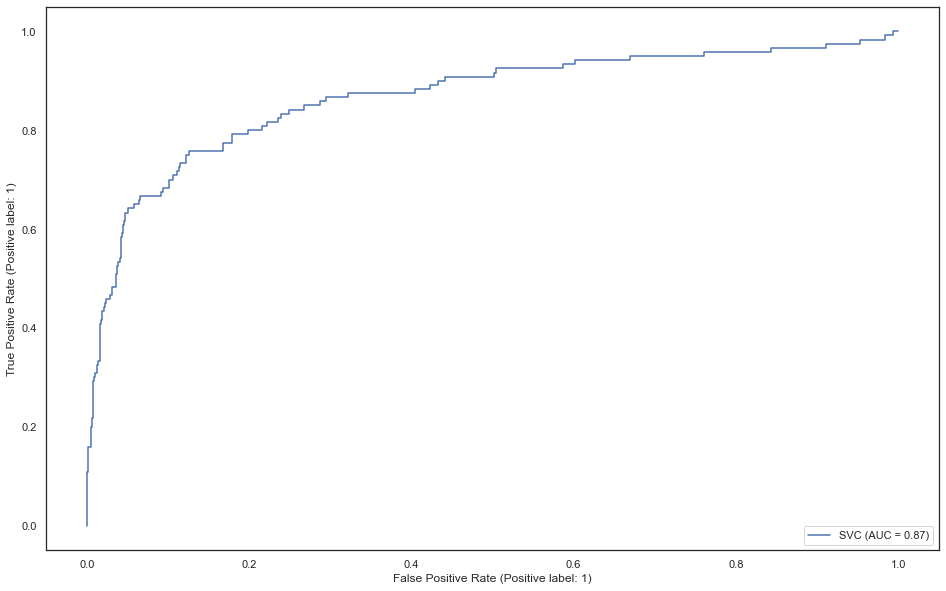

In [637]:
plt.figure(figsize=(2,3))
plot_roc_curve(svm,X_test, y_test)
plt.show()                                                         #plotting the roc curve using svm model.

# LOGISTIC REGRESSION

In [594]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
clc = regressor.fit(X_train, y_train)
regressor

C:\Users\ranab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [595]:
y1_pred = clc.predict(X_test)   #predicting the values of y_test

In [598]:
y_train_pred1= clc.predict(X_train)

## Train Test accuracy

In [599]:
print("Test accuracy_score: " + str(accuracy_score(y_test, y1_pred)))
print("Train accuracy_score: " + str(accuracy_score(y_train, y_train_pred1)))

Test accuracy_score: 0.9418181818181818
Train accuracy_score: 1.0


In [649]:
train_scores = clc.score(X_train,y_train)
test_scores = clc.score(X_test,y_test)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


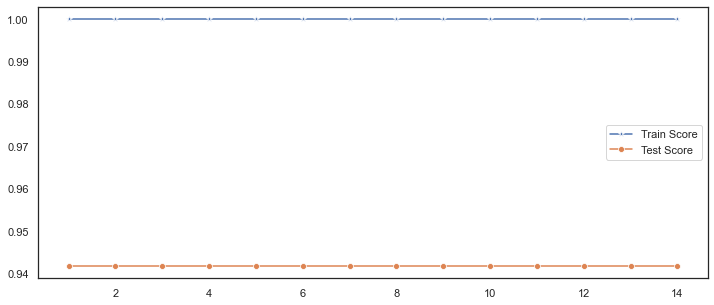

In [650]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

In [600]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y1_pred)                                          #Displaying the accuracy score of the model

0.9418181818181818

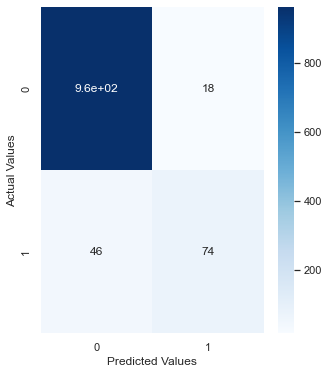

In [601]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, y1_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                              #Displaying the confusion matrix

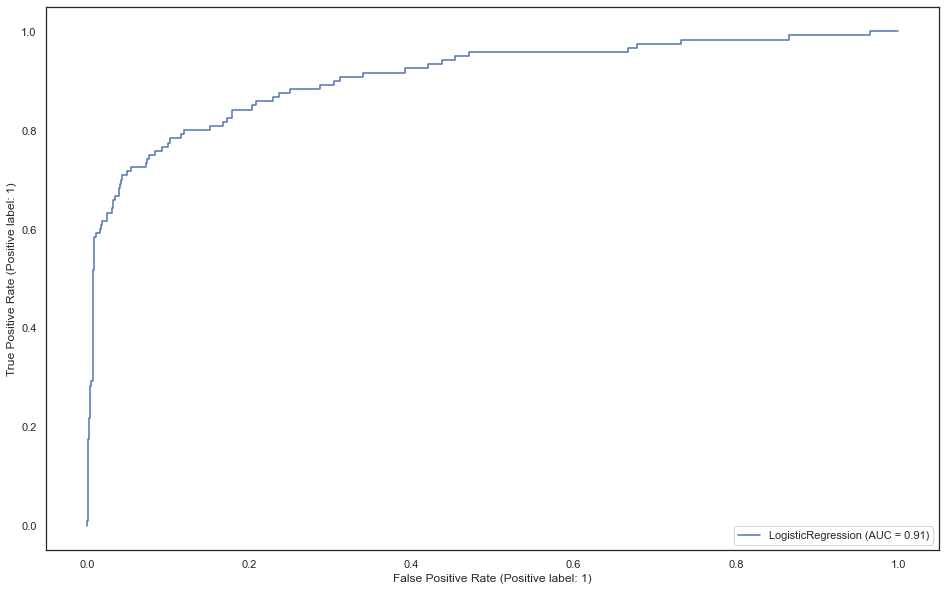

In [602]:
plot_roc_curve(clc,X_test, y_test)
plt.show()                                                              #Plotting the ROC curve using Logistic regression model.

In [603]:
from sklearn.metrics import recall_score
recall_score(y_test,y1_pred)                                            #Displaying the recall score of the model.

0.6166666666666667

In [604]:
from sklearn.metrics import precision_score
precision_score(y_test,y1_pred)                                         #Displaying the precision score of the model.

0.8043478260869565

In [605]:
f1_score(y_test,y1_pred)                                               #Displaying the precision score of the model

0.6981132075471699

# DECISION TREE 

In [532]:
from sklearn.tree import DecisionTreeClassifier, plot_tree             #Importing the model Decision Tree

## Train Test accuracy

In [533]:
model = DecisionTreeClassifier(max_depth= 20)
model.fit(X_train, y_train)
predsdtc = model.predict(X_test)
predsdtc1 = model.predict(X_train)
print("Test accuracy_score: " + str(accuracy_score(y_test, predsdtc)))
print("Train accuracy_score: " + str(accuracy_score(y_train, predsdtc1)))

Test accuracy_score: 0.91
Train accuracy_score: 1.0


In [645]:
train_scores = model.score(X_train,y_train)
test_scores = model.score(X_test,y_test)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


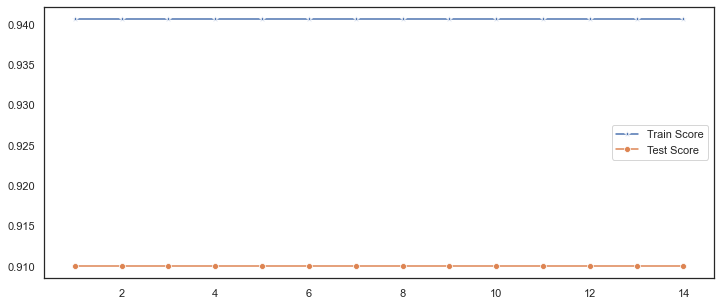

In [646]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

In [614]:
print("f1_score: " + str(f1_score(y_test, predsdtc)))                  #Displaying F1 score of the model.

f1_score: 0.6086956521739131


In [615]:
precision_score(y_test,predsdtc)                                       #Displaying Precision score of the model.

0.5789473684210527

In [570]:
recall_score(y_test,predsdtc)                                          #Displaying Recall score of the model.

0.6416666666666667

In [616]:
print("ROC AUC score: " + str(roc_auc_score(y_test, predsdtc)))       #Displaying ROC AUC score of the model.

ROC AUC score: 0.7922619047619047


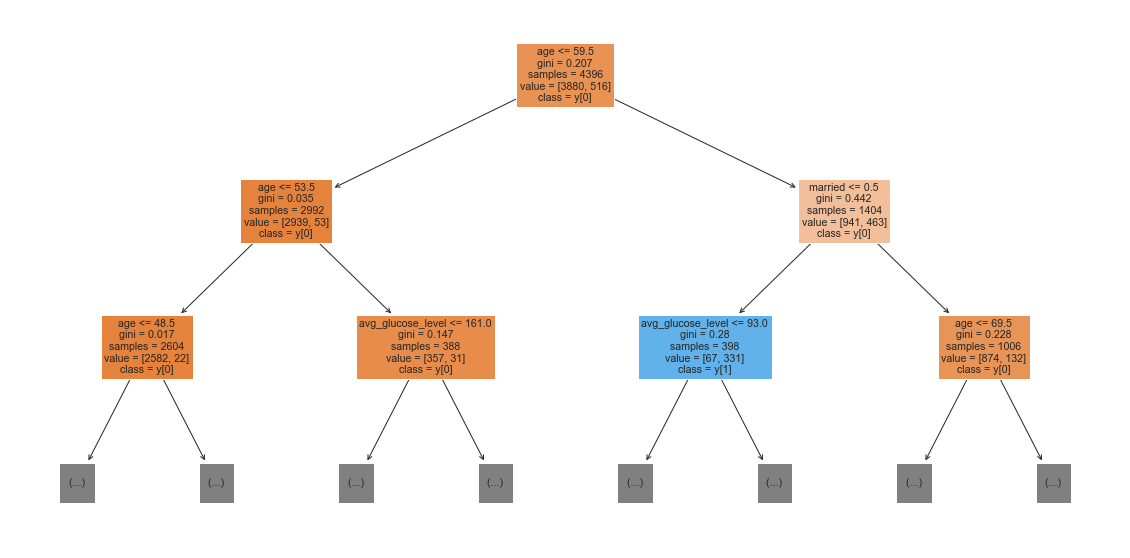

In [617]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=X_train.columns,max_depth = 2,filled=True,class_names = True)
plt.show()                                                           #Plot of trees in the given dataset.

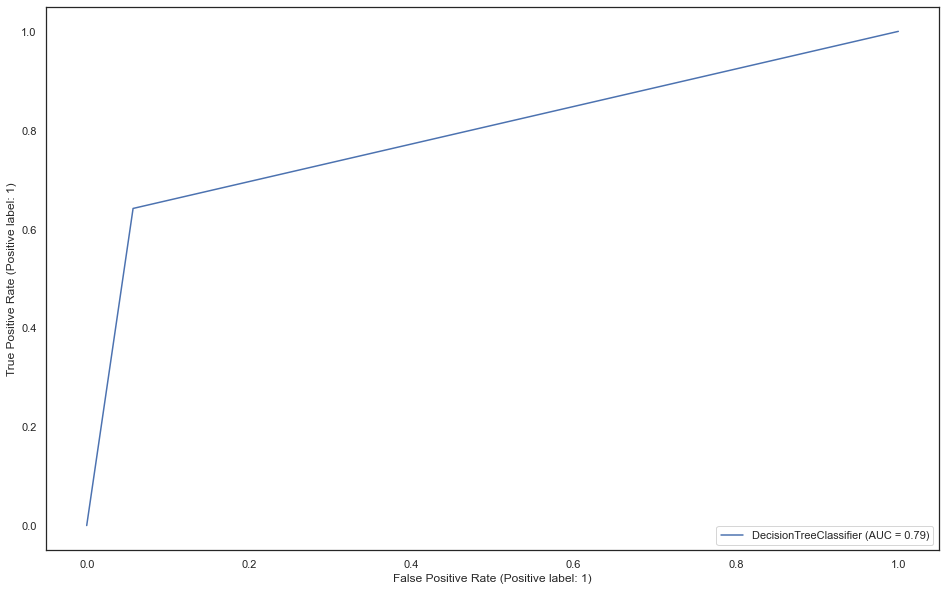

In [537]:
plot_roc_curve(model,X_test, y_test)
plt.show()                                                   #plotting ROC Curve of the model.

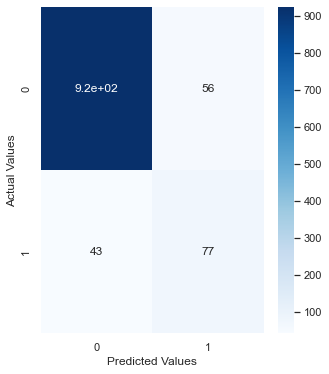

In [538]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test,predsdtc)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                            #Confusion matrix of the model prediction.

# RANDOM FOREST

In [540]:
from sklearn.ensemble import RandomForestClassifier                  #Importing Random Forest Classifier.

In [541]:
rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [642]:
train_scores = rf.score(X_train,y_train)
test_scores = rf.score(X_test,y_test)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


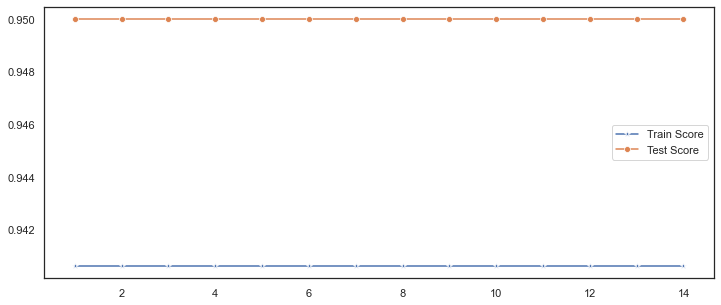

In [643]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

## Train Test Accuracy

In [542]:
y_pred_train_rf = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_rf)
print("Test accuracy_score: " + str(accuracy_score(y_test,y_pred_test_rf)))
print("Train accuracy_score: " + str(accuracy_score(y_train,y_pred_train_rf)))

Test accuracy_score: 0.95
Train accuracy_score: 1.0


In [543]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC Score:', roc_score)                         #Displaying the ROC AUC score of the model.

ROC AUC Score: 0.9153826530612245


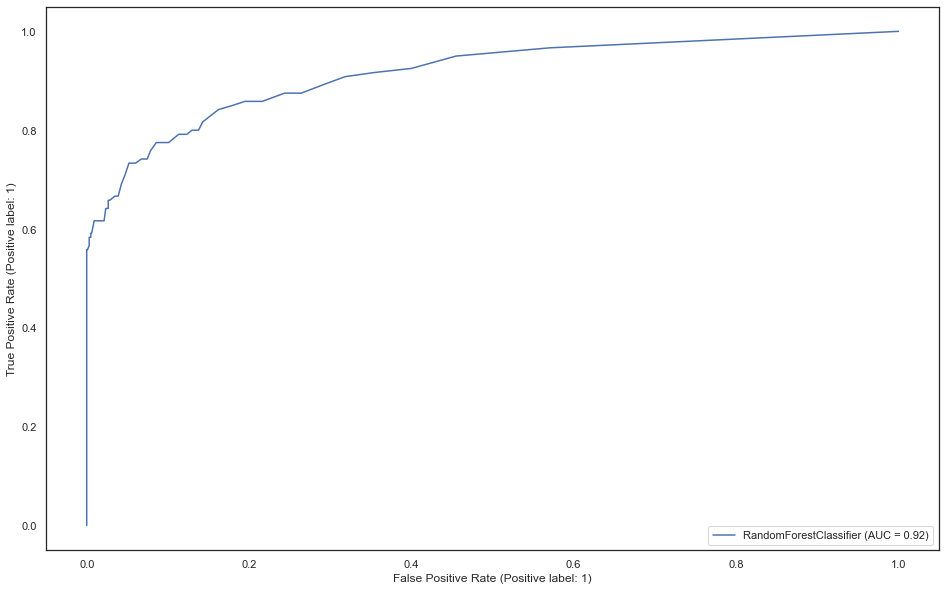

In [544]:
plot_roc_curve(rf,X_test, y_test)
plt.show()                                                 #Displaying the roc curve of the model.

In [545]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_test_rf)                         #Displaying precision score of the model

0.922077922077922

In [638]:
accuracy_score(y_test,y_pred_test_rf)

0.95

In [550]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_test_rf)                            #Displaying Recall score of the model

0.5916666666666667

In [571]:
f1_score(y_test,y_pred_test_rf)                               #Displaying F1 score of the model

0.7208121827411168

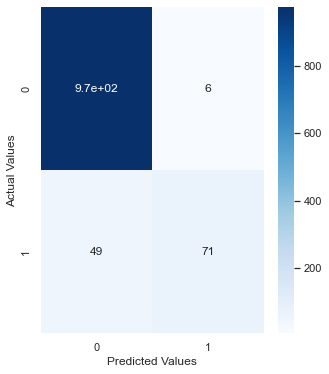

In [582]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, y_pred_test_rf)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                   #Displaying confusion matrix of the model prediction.

# KNN

In [546]:
from sklearn.neighbors import KNeighborsClassifier                        #importing KNN classifier.


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

## Train Test Accuracy

In [618]:
train_accuracy = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == train_accuracy]
print('Train Accuracy {} % and k = {}'.format(train_accuracy*100,list(map(lambda x: x+1, train_scores_ind))))
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Test Accuracy {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Train Accuracy 100.0 % and k = [1]
Test Accuracy 91.72727272727272 % and k = [13, 14]


C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


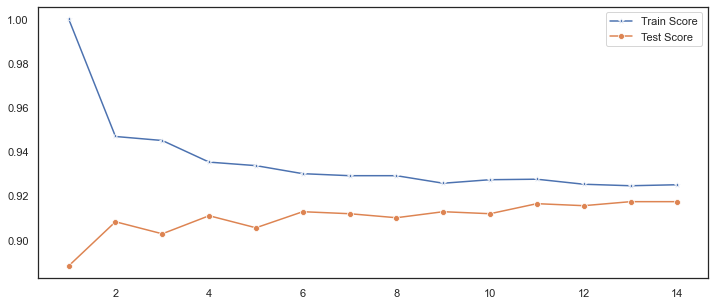

In [549]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

In [341]:
knn = KNeighborsClassifier(8)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)                              #accuracy score of the model.

0.9458577951728636

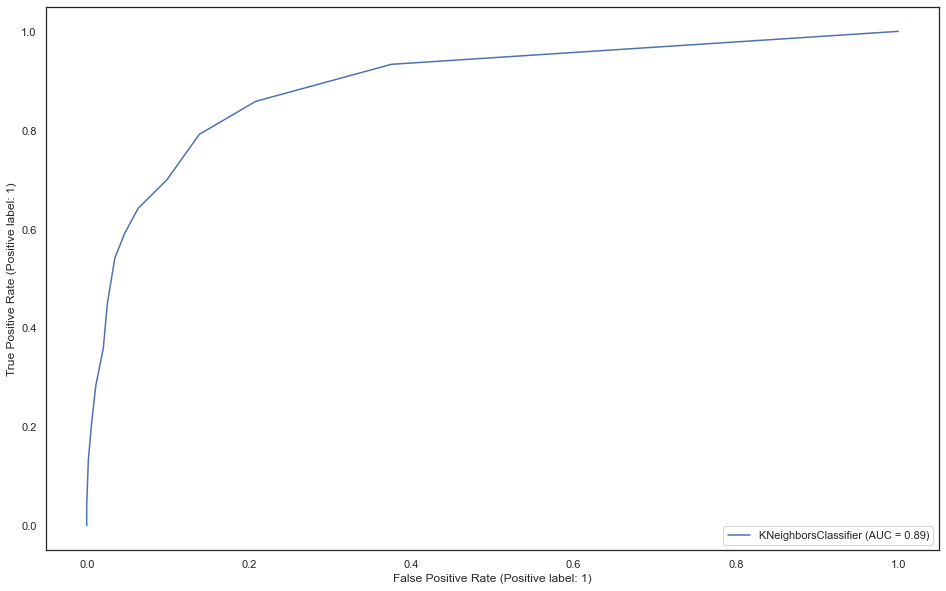

In [619]:
plot_roc_curve(knn,X_test, y_test)
plt.show()                                            #Plotting the ROC curve of the model.

In [620]:
Y_pred = knn.predict(X_test)
Y_pred_train= knn.predict(X_train)

In [624]:
from sklearn.metrics import precision_score
precision_score(y_train,Y_pred_train)                                         #Displaying the precision score of the model.

0.6910112359550562

In [625]:
recall_score(y_test,Y_pred)                                                  #Displaying the recall score of the model.

0.45

In [626]:
f1_score(y_test,Y_pred)                                                     #Displaying the F1 Score of the model.

0.5427135678391959

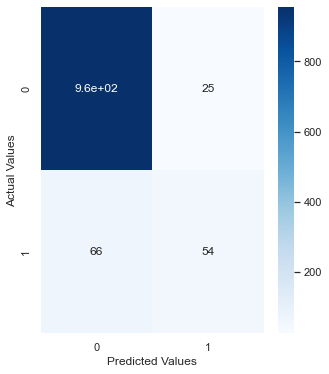

In [627]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, Y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                                #Displaying the confusion matrix of the knn model

# METRICS COMPARISION AMONG MODELS 

In [628]:
print("Precision score of KNN is:", precision_score(y_test,Y_pred))
print("Precision score of Random Forest Classifier is:", precision_score(y_test,y_pred_test_rf))
print("Precision score of Decision Tree Classifier is:", precision_score(y_test,predsdtc))
print("Precision score of Support Vector Machine is:", precision_score(y_test,y_pred))
print("Precision score of Logistic Regression is:", precision_score(y_test,y1_pred))

Precision score of KNN is: 0.6835443037974683
Precision score of Random Forest Classifier is: 0.922077922077922
Precision score of Decision Tree Classifier is: 0.5789473684210527
Precision score of Support Vector Machine is: 0.7377049180327869
Precision score of Logistic Regression is: 0.8043478260869565


In [629]:
print("Recall score of KNN is:", recall_score(y_test,Y_pred))
print("Recall score of Random Forest Classifier is:", recall_score(y_test,y_pred_test_rf))
print("Recall score of Decision Tree Classifier is:", recall_score(y_test,predsdtc))
print("Recall score of Support Vector Machine is:", recall_score(y_test,y_pred))
print("Recall score of Logistic Regression is:", recall_score(y_test,y1_pred))

Recall score of KNN is: 0.45
Recall score of Random Forest Classifier is: 0.5916666666666667
Recall score of Decision Tree Classifier is: 0.6416666666666667
Recall score of Support Vector Machine is: 0.375
Recall score of Logistic Regression is: 0.6166666666666667


In [630]:
print("F1 score of KNN is:", f1_score(y_test,Y_pred))
print("F1 score of Random Forest Classifier is:", f1_score(y_test,y_pred_test_rf))
print("F1 score of Decision Tree Classifier is:", f1_score(y_test,predsdtc))
print("F1 score of Support Vector Machine is:", f1_score(y_test,y_pred))
print("F1 score of Logistic Regression is:", f1_score(y_test,y1_pred))

F1 score of KNN is: 0.5427135678391959
F1 score of Random Forest Classifier is: 0.7208121827411168
F1 score of Decision Tree Classifier is: 0.6086956521739131
F1 score of Support Vector Machine is: 0.49723756906077343
F1 score of Logistic Regression is: 0.6981132075471699


In [631]:
print("Accuracy score of KNN is:", accuracy_score(y_test,Y_pred))
print("Accuracy score of Random Forest Classifier is:", accuracy_score(y_test,y_pred_test_rf))
print("Accuracy score of Decision Tree Classifier is:", accuracy_score(y_test,predsdtc))
print("Accuracy score of Support Vector Machine is:", accuracy_score(y_test,y_pred))
print("Accuracy score of Logistic Regression is:", accuracy_score(y_test,y1_pred))

Accuracy score of KNN is: 0.9172727272727272
Accuracy score of Random Forest Classifier is: 0.95
Accuracy score of Decision Tree Classifier is: 0.91
Accuracy score of Support Vector Machine is: 0.9172727272727272
Accuracy score of Logistic Regression is: 0.9418181818181818
